## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [83]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%matplotlib qt
import os
from ipywidgets import interact, interactive, fixed

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
# input_path ="./camera_cal/"

# images = os.listdir(input_path)

# print(images)
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    
    print(ret)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)
#         plt.imshow(img)

    cv2.imshow('img',img)
    cv2.waitKey(500)
    plt.imshow(img)

cv2.destroyAllWindows()

## Find and Draw Chessboard corners

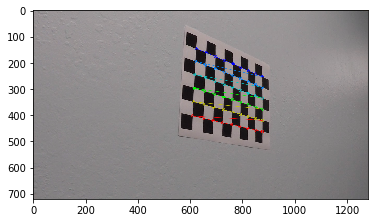

In [84]:
%matplotlib inline

def camera_chessboards(glob_regex='camera_cal/calibration*.jpg'):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    chessboards = [] # array of chessboard images
    
    # Make a list of calibration images
    images = glob.glob(glob_regex)

    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(images):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
            # Draw and display the corners
            cv2.drawChessboardCorners(img, (9,6), corners, ret)
            chessboards.append(img)
            # plt.imshow(img)

    return objpoints, imgpoints, chessboards

objpoints, imgpoints, chessboards = camera_chessboards()
 #print(objpoints,"\n","\n",imgpoints,"\n","\n",chessboards,"\n","\n")

In [85]:
%matplotlib inline

# n = len(chessboards)

# def view_image(i):
#         plt.imshow(chessboards[i], cmap=plt.cm.gray_r, interpolation='nearest')
#         plt.title('Chessboard: %d' % i)
#         plt.show()
        
# for i in range(0,n):
#     view_image(i)
    

def browse_chessboards(chessboards):
    n = len(chessboards)
    def view_image(i):
        plt.imshow(chessboards[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Chessboard: %d' % i)
        plt.show()
    interact(view_image, i=(0,n-1))
    
browse_chessboards(chessboards)


interactive(children=(IntSlider(value=8, description='i', max=16), Output()), _dom_classes=('widget-interact',…

## Camera calibration and undistortion

* Below function takes the image , object points and image points as input parameters.
* Performs camera calibration, image distortion correction
* Returns the undistorted images

In [86]:

def camera_calibrate(objpoints, imgpoint, img):
    # Test undistortion on an image
    img_size = img.shape[1::-1]

    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    

    return ret, mtx, dist, dst

## Visualizing undistortion

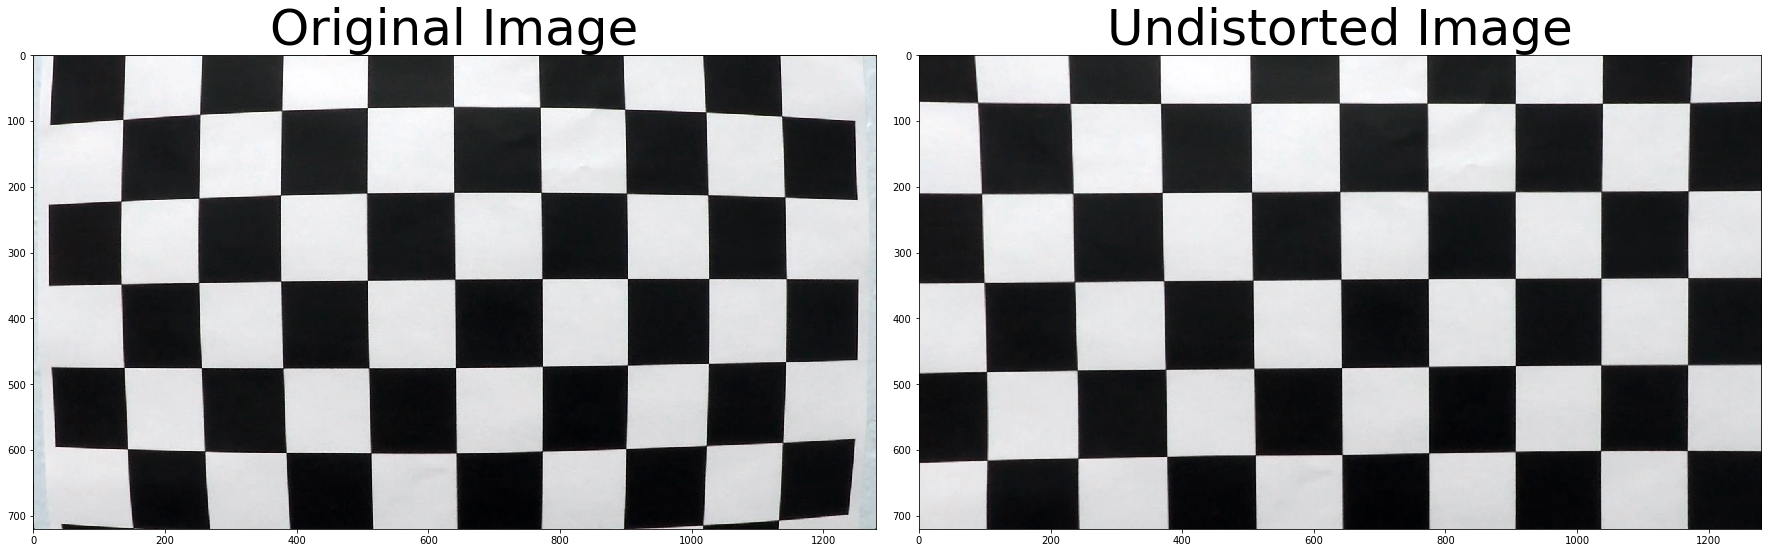

In [78]:
%matplotlib inline



test_img='camera_cal/calibration1.jpg'
undistort_img='output_images/undistort_output.jpg'


img = cv2.imread(test_img)
ret, mtx, dist, dst = camera_calibrate(objpoints, imgpoints, img)

cv2.imwrite(undistort_img, dst)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
